# Model of predicting the diabetes.


In [1]:
# importing libraries.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm


In [2]:
# loading of data

df=pd.read_csv('diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Outcome'>

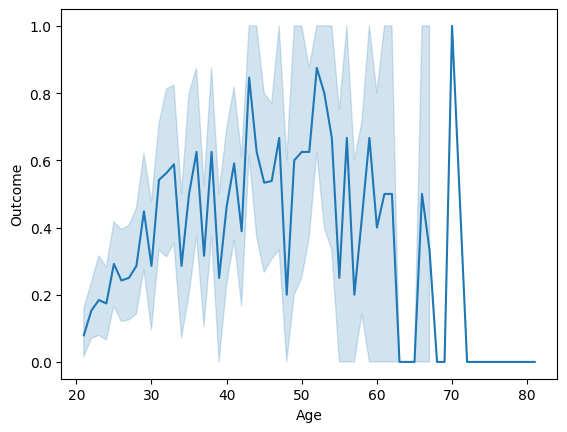

In [9]:
sns.lineplot(x="Age",y="Outcome",data=df)

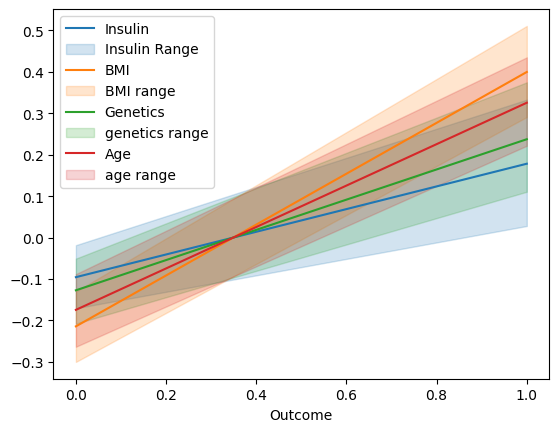

In [22]:
sns.lineplot(y=sx[:,4],x=Y)
sns.lineplot(y=sx[:,5],x=Y)
sns.lineplot(y=sx[:,6],x=Y)
sns.lineplot(y=sx[:,7],x=Y)
plt.legend(["Insulin","Insulin Range", "BMI","BMI range","Genetics","genetics range","Age","age range"])

In [14]:
# separating the data and labels
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [15]:
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Data Standardisation

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(x)

StandardScaler()

In [18]:
standardized_data=scaler.transform(x)

In [19]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [20]:
sx=standardized_data
Y=df['Outcome']


In [23]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(sx,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
X_train.shape, Y_train.shape

((614, 8), (614,))

# training model

In [27]:
from sklearn.svm import SVC


In [28]:
sv=svm.SVC(kernel='linear')
sv.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Score
accuraacy_score

In [29]:
#accuracy score
from sklearn.metrics import accuracy_score


In [30]:
#accuracy of test data
X_test_pred=sv.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)
print('accuracy score of test data: ',test_data_accuracy )

accuracy score of test data:  0.7727272727272727


In [31]:
#accuracy of train data
X_train_pred=sv.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)
print('accuracy score of train data: ',training_data_accuracy )

accuracy score of train data:  0.7866449511400652


# Making a Predictive System

In [32]:
Input_data=(4,110,92,0,0,37.6,0.191,30)
# changing the input data to numpy array
input_data_as_numpy_array=np.asarray(Input_data)

In [33]:
print(input_data_as_numpy_array)

[  4.    110.     92.      0.      0.     37.6     0.191  30.   ]


In [34]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [35]:
#standardise the inut data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]


C:\Users\satyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
prediction=sv.predict(std_data)
print(prediction)


[0]


In [37]:
if (prediction[0]==0):
    print('the person is non diabetic')
else:
    print('the person is diabetic')

the person is non diabetic
